In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import graphviz 


In [ ]:
train = pd.read_csv('../data/train.csv')
y_predict = train['Survived']

In [103]:
grouped = train.groupby(['Ticket'])
#grouped.aggregate(np.size)
grouped.groups
#grouped.groups['110152'].size
train['Ticket_Group_Size'] = train.Ticket.apply(lambda x: grouped.groups[x].size)
train['GroupTravel'] = train.Ticket_Group_Size.apply(lambda x: 1 if x>1 else  0)
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Group_Size,GroupTravel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,1


In [85]:
unique_group_sizes = train.Ticket_Group_Size.unique()
unique_group_sizes.sort()
#np.sort(unique_group_sizes)
unique_group_sizes


array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [34]:
group_size_1 = train[train['Ticket_Group_Size']==1]
group_size_1_survivors = group_size_1[group_size_1['Survived']==1].shape[0]
group_size_1_perish = group_size_1[group_size_1['Survived']==0].shape[0]
print("Grp 1 Survivors",group_size_1_survivors)
print("Grp 1 Perish",group_size_1_perish)

Grp 1 Survivors 163
Grp 1 Perish 384


In [41]:
survivor_count=[]
perish_count=[]
for g in range(unique_group_sizes.size):
    group = train[train['Ticket_Group_Size']== unique_group_sizes[g]]
    survivor_count.append(group[group['Survived']==1].shape[0])
    perish_count.append(group[group['Survived']==0].shape[0])

print(survivor_count)
print(perish_count)

[163, 108, 44, 22, 0, 0, 5]
[384, 80, 19, 22, 10, 18, 16]


In [42]:
totals = [i+j for i,j in zip(survivor_count, perish_count)]
totals

[547, 188, 63, 44, 10, 18, 21]

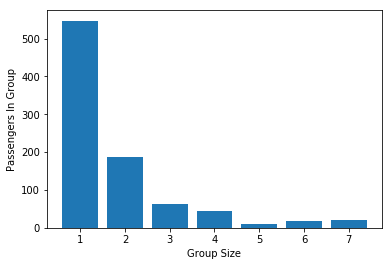

In [92]:
width = 0.8
ind = np.arange(unique_group_sizes.size)
p = plt.bar(ind, totals, width)
plt.xticks(ind, unique_group_sizes)
plt.ylabel('Passengers In Group')
plt.xlabel('Group Size')
plt.show()

In [73]:
survive_percent = [i/j * 100 for i,j in zip(survivor_count, totals)]
perish_percent =  [i/j * 100 for i,j in zip(perish_count, totals)]

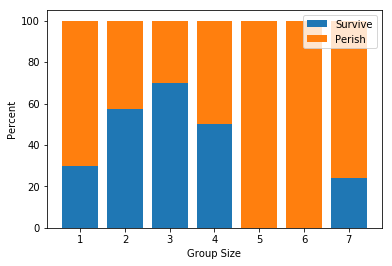

In [89]:

width = 0.8
ind = np.arange(unique_group_sizes.size)

p_survive = plt.bar(ind,survive_percent, width)
p_perish = plt.bar(ind, perish_percent,width, bottom=survive_percent)
plt.xticks(ind, unique_group_sizes)
plt.ylabel('Percent')
plt.xlabel('Group Size')
plt.legend((p_survive[0], p_perish[0]), ('Survive', 'Perish'))

plt.show()

In [101]:
multi_member_group_survival = np.sum(survivor_count[1:])
multi_member_group_perish = np.sum(perish_count[1:])
print("Multi Member Group Size= ",multi_member_group_survival + multi_member_group_perish)
print("Multi Member Group Survival Rate= ",multi_member_group_survival/(multi_member_group_survival + multi_member_group_perish))

single_member_survivors = survivor_count[0]
single_member_perish = perish_count[0]
print("Single Member Group Size= ",single_member_survivors + single_member_perish )
print("Single Member Group Survival Rate= ",single_member_survivors/(single_member_survivors + single_member_perish ))


Multi Member Group Size=  344
Multi Member Group Survival Rate=  0.5203488372093024
Single Member Group Size=  547
Single Member Group Survival Rate=  0.2979890310786106
